In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Machine learning algorithms
from sklearn.neural_network import MLPRegressor

# Machine learning pipeline 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Check the fitted_model
from sklearn.exceptions import NotFittedError



import torch 
import torch.nn as nn
import tensorflow as tf
import time

In [2]:
import os
base_path = 'D:\RRG\VP\MBRDI\Coding_Problem_2\dataset'

In [4]:
train = os.path.join(base_path, '25degC')
l = os.listdir(train)
l = [i for i in l if i.endswith('.csv')]
l

['549_C20DisCh.csv',
 '549_Charge.csv',
 '549_Dis_0p5C.csv',
 '549_Dis_2C.csv',
 '549_HPPC.csv',
 '551_Cap_1C.csv',
 '551_Charge1.csv',
 '551_Charge2.csv',
 '551_Charge3.csv',
 '551_Charge4.csv',
 '551_Charge5.csv',
 '551_Charge6.csv',
 '551_Charge7.csv',
 '551_Charge8.csv',
 '551_HWFET.csv',
 '551_LA92.csv',
 '551_Mixed1.csv',
 '551_Mixed2.csv',
 '551_UDDS.csv',
 '551_US06.csv',
 '552_Cap_1C.csv',
 '552_Charge10.csv',
 '552_Charge11.csv',
 '552_Charge12.csv',
 '552_Charge13.csv',
 '552_Charge14.csv',
 '552_Charge15.csv',
 '552_Charge16.csv',
 '552_Charge9.csv',
 '552_Mixed3.csv',
 '552_Mixed4.csv',
 '552_Mixed5.csv',
 '552_Mixed6.csv',
 '552_Mixed7.csv',
 '552_Mixed8.csv',
 '552_PausCycl.csv']

In [5]:
train_csv = os.path.join(train, '551_LA92.csv')
train_csv

'D:\\RRG\\VP\\MBRDI\\Coding_Problem_2\\dataset\\25degC\\551_LA92.csv'

In [6]:
df = pd.read_csv(train_csv, skiprows=30)
df.head()

,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.323,00:00:01.673,1,1.1,LG_HG2_CyclesA,4.19155,-0.05108,23.76583,-0.00000,-0.00000.1,5.00000,Unnamed: 14
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0,NaN
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0,NaN
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0,NaN
3,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.723,00:00:02.073,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00004,5.0,NaN
4,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.821,00:00:02.171,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00005,5.0,NaN


In [7]:
df.columns = ['Time Stamp','Step','Status','Prog Time','Step Time','Cycle',
                            'Cycle Level','Procedure','Voltage','Current','Temperature','Capacity','WhAccu','Cnt','Empty']

In [8]:
df.head()

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt,Empty
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0,NaN
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0,NaN
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0,NaN
3,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.723,00:00:02.073,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00004,5.0,NaN
4,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.821,00:00:02.171,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00005,5.0,NaN


In [10]:
df = df.iloc[:, :-1]
df.head(3)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0


In [12]:
df.describe()

,Step,Cycle,Cycle Level,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
count,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.000000,100763.0
mean,39.119111,3.590197,0.940444,3.702031,-0.926346,24.246026,-1.336233,-4.964102,5.0
std,0.473326,2.064147,0.236663,0.282690,2.406846,0.222317,0.789170,2.811615,0.0
min,39.000000,0.000000,0.000000,2.859260,-12.144700,23.660670,-2.590260,-9.263270,5.0
25%,39.000000,2.000000,1.000000,3.499510,-2.331880,24.081300,-1.999075,-7.365255,5.0
50%,39.000000,4.000000,1.000000,3.716890,-0.155800,24.186460,-1.303810,-4.958720,5.0
75%,39.000000,5.000000,1.000000,3.946430,0.000000,24.396780,-0.663455,-2.591270,5.0
max,41.000000,7.000000,1.000000,4.208720,5.999610,25.027730,-0.000000,-0.000010,5.0


In [13]:
df.tail()

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
100758,10/29/2018 6:41:45 AM,41,PAU,19:38:40.600,00:09:59.701,0,0,LG_HG2_CyclesA,3.21385,0.0,24.0813,-2.59026,-9.26327,5.0
100759,10/29/2018 6:41:45 AM,41,PAU,19:38:40.701,00:09:59.802,0,0,LG_HG2_CyclesA,3.21385,0.0,24.0813,-2.59026,-9.26327,5.0
100760,10/29/2018 6:41:45 AM,41,PAU,19:38:40.798,00:09:59.899,0,0,LG_HG2_CyclesA,3.21385,0.0,24.0813,-2.59026,-9.26327,5.0
100761,10/29/2018 6:41:46 AM,41,PAU,19:38:40.900,00:10:00.001,0,0,LG_HG2_CyclesA,3.21385,0.0,24.0813,-2.59026,-9.26327,5.0
100762,10/29/2018 6:41:46 AM,41,PAU,19:38:40.900,00:10:00.001,0,0,LG_HG2_CyclesA,3.21385,0.0,24.0813,-2.59026,-9.26327,5.0


In [14]:
df = df[(df["Status"] == "TABLE") | (df["Status"] == "DCH")]
df.head(3)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.423,00:00:01.773,1,1,LG_HG2_CyclesA,4.19088,-0.08173,23.76583,-0.00000,-0.00001,5.0
1,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.522,00:00:01.872,1,1,LG_HG2_CyclesA,4.19054,-0.08939,23.76583,-0.00000,-0.00002,5.0
2,10/29/2018 3:53:42 AM,39,TABLE,16:50:37.622,00:00:01.972,1,1,LG_HG2_CyclesA,4.19037,-0.09195,23.76583,-0.00001,-0.00003,5.0


In [15]:
df.tail()

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
94757,10/29/2018 6:31:45 AM,39,TABLE,19:28:40.577,00:14:20.346,7,1,LG_HG2_CyclesA,2.86634,-9.90731,24.39678,-2.58915,-9.26010,5.0
94758,10/29/2018 6:31:45 AM,39,TABLE,19:28:40.678,00:14:20.447,7,1,LG_HG2_CyclesA,2.86415,-9.92519,24.39678,-2.58943,-9.26089,5.0
94759,10/29/2018 6:31:45 AM,39,TABLE,19:28:40.778,00:14:20.547,7,1,LG_HG2_CyclesA,2.86179,-9.93796,24.39678,-2.58971,-9.26169,5.0
94760,10/29/2018 6:31:46 AM,39,TABLE,19:28:40.878,00:14:20.647,7,1,LG_HG2_CyclesA,2.85977,-9.94562,24.39678,-2.58998,-9.26248,5.0
94761,10/29/2018 6:31:46 AM,39,TABLE,19:28:40.897,00:14:20.666,7,1,LG_HG2_CyclesA,2.85926,-9.95073,24.39678,-2.59026,-9.26327,5.0


In [16]:
max_discharge = abs(min(df["Capacity"])) 
df["SoC Capacity"] = max_discharge + df["Capacity"]
df["SoC Percentage"] = df["SoC Capacity"] / max(df["SoC Capacity"])

In [17]:
df.shape

(94762, 16)

In [19]:
df.isnull().sum()

Time Stamp        0
Step              0
Status            0
Prog Time         0
Step Time         0
Cycle             0
Cycle Level       0
Procedure         0
Voltage           0
Current           0
Temperature       0
Capacity          0
WhAccu            0
Cnt               0
SoC Capacity      0
SoC Percentage    0
dtype: int64

In [20]:
x = df[["Voltage", "Current", "Temperature"]].to_numpy()
y = df[["SoC Percentage"]].to_numpy()

In [21]:
cycles = []
cycles.append((x, y))

In [22]:
print(cycles[0][0])

[[ 4.19088 -0.08173 23.76583]
 [ 4.19054 -0.08939 23.76583]
 [ 4.19037 -0.09195 23.76583]
 ...
 [ 2.86179 -9.93796 24.39678]
 [ 2.85977 -9.94562 24.39678]
 [ 2.85926 -9.95073 24.39678]]


In [23]:
df[["Voltage", "Current", "Temperature"]].head()

,Voltage,Current,Temperature
0,4.19088,-0.08173,23.76583
1,4.19054,-0.08939,23.76583
2,4.19037,-0.09195,23.76583
3,4.19037,-0.09195,23.76583
4,4.19037,-0.09195,23.76583


In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1234)
pipelines = {
    'mlp'   : make_pipeline(StandardScaler(), MLPRegressor(random_state=123))
}

In [26]:
# MLP hyperparameters
mlp_hyperparameters = {
    'mlpregressor__hidden_layer_sizes': [(5,), (10,), (100,)],
    'mlpregressor__activation': ['logistic', 'relu', 'tanh']
}

# Create hyperparameters dictionary
hyperparameters = {
    'mlp': mlp_hyperparameters
}

In [27]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mlp has been fitted.


In [28]:
for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print (name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

mlp has been fitted.


In [29]:
for name,model in fitted_models.items():
    pred = fitted_models[name].predict(X_test)
    print(name)
    print('R2:', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))

mlp
R2: 0.9939432391537922
MAE: 0.016670068802988876


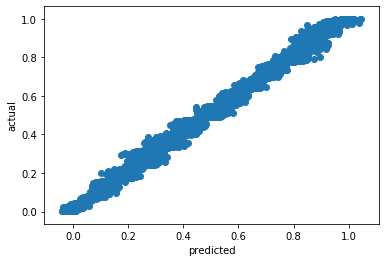

In [30]:
mlp_pred = fitted_models['mlp'].predict(X_test)
plt.scatter(mlp_pred, y_test)
plt.xlabel('predicted')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
plt.ylabel('actual')
plt.show()

In [31]:
fitted_models['mlp'].best_estimator_

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(100,),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=200, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=123, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)